In [ ]:
import pandas as pd
import numpy as np
import itertools
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

In [ ]:
# prompt: loading data using python in colab usinf from google drive
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

path='/content/drive/MyDrive/Colab Notebooks/ProjectTrainingData.csv'
df = pd.read_csv(path)



ra

In [ ]:
df.shape

(31991090, 24)

In [ ]:
df.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,2.961041e+17,0,14102605,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,1,0,16688,320,50,1873,3,39,-1,23
1,1.478045e+18,0,14102301,1005,1,a7853007,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,9478,320,50,906,3,1451,100156,61
2,1.268146e+19,0,14102604,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100083,79
3,8.091636e+18,0,14102513,1005,0,bb4524e7,d733bbc3,28905ebd,ecad2386,7801e8d9,...,1,0,20251,320,50,2323,0,687,100081,48
4,4.168309e+18,0,14102703,1005,0,85f751fd,c4e18dd6,50e219e0,03528b27,2347f47a,...,1,0,17016,320,50,1873,3,39,100058,23


In [ ]:
df.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
5,1.000072e+19,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100077,117
6,1.000072e+19,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
7,1.000092e+19,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20632,320,50,2374,3,39,-1,23
8,1.000126e+19,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21689,320,50,2496,3,167,100191,23
9,1.000187e+19,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17747,320,50,1974,2,39,100019,33


In [ ]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06,6.398218e+06
mean,9.220288e+18,1.699115e-01,1.410251e+07,1.004971e+03,2.939884e-01,1.017906e+00,3.277877e-01,1.858676e+04,3.188414e+02,6.016146e+01,2.081063e+03,1.432297e+00,2.216592e+02,5.364762e+04,8.060708e+01
std,5.325434e+18,3.755551e-01,2.676083e+02,1.114664e+00,5.099557e-01,5.395751e-01,8.552026e-01,4.974360e+03,2.152456e+01,4.753677e+01,6.094410e+02,1.323424e+00,3.493629e+02,4.992750e+04,6.702210e+01
min,7.601780e+12,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.607624e+18,0.000000e+00,1.410222e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.668500e+04,3.200000e+02,5.000000e+01,1.800000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.221331e+18,0.000000e+00,1.410251e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.015300e+04,3.200000e+02,5.000000e+01,2.299000e+03,2.000000e+00,3.900000e+01,1.000550e+05,6.100000e+01
75%,1.383317e+19,0.000000e+00,1.410280e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.177000e+04,3.200000e+02,5.000000e+01,2.506000e+03,3.000000e+00,1.690000e+02,1.000940e+05,9.100000e+01
max,1.844674e+19,1.000000e+00,1.410292e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.383600e+04,1.024000e+03,1.024000e+03,2.729000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.530000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 366.2+ MB


In [ ]:
name_with_unque_value = dict()
for name in df.columns:
    name_with_unque_value[name] = df[name].nunique()

name_with_unque_value

{'id': 31991090,
 'click': 2,
 'hour': 216,
 'C1': 7,
 'banner_pos': 7,
 'site_id': 4581,
 'site_domain': 7341,
 'site_category': 26,
 'app_id': 8088,
 'app_domain': 526,
 'app_category': 36,
 'device_id': 2296165,
 'device_ip': 5762925,
 'device_model': 8058,
 'device_type': 5,
 'device_conn_type': 4,
 'C14': 2465,
 'C15': 8,
 'C16': 9,
 'C17': 407,
 'C18': 4,
 'C19': 66,
 'C20': 171,
 'C21': 55}

## change the format of the hour column

In [ ]:
# prompt: how to extract year, month, day, hour from a column that has format YYMMDDHH and make columns for those
new_df=df.copy()


In [ ]:
import pandas as pd

# Example: If 'date_column' is a datetime column in your dataset
new_df['hour']= pd.to_datetime(df['hour'], format='%y%m%d%H')
new_df['hour_of_day'] = new_df['hour'].dt.hour
new_df['day_of_the_week'] = new_df['hour'].dt.day
new_df.drop('hour', axis=1, inplace=True)  # Drop the original datetime column


In [ ]:
import pandas as pd

# Example: If 'date_column' is a datetime column in your dataset
new_df['hour']= pd.to_datetime(df['hour'], format='%y%m%d%H')
new_df['hour_of_day'] = new_df['hour'].dt.hour
new_df['day_of_the_week'] = new_df['hour'].dt.day
new_df.drop('hour', axis=1, inplace=True)  # Drop the original datetime column

In [ ]:
new_df.head(10)

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_the_week
0,1.000009e+18,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,-1,79,0,21
1,1.000017e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,0,21
2,1.000037e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,0,21
3,1.000064e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,100084,79,0,21
4,1.000068e+19,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,18993,320,50,2161,0,35,-1,157,0,21
5,1.000072e+19,0,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,...,16920,320,50,1899,0,431,100077,117,0,21
6,1.000072e+19,0,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,...,20362,320,50,2333,0,39,-1,157,0,21
7,1.000092e+19,0,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,20632,320,50,2374,3,39,-1,23,0,21
8,1.000126e+19,0,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,...,21689,320,50,2496,3,167,100191,23,0,21
9,1.000187e+19,0,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,17747,320,50,1974,2,39,100019,33,0,21


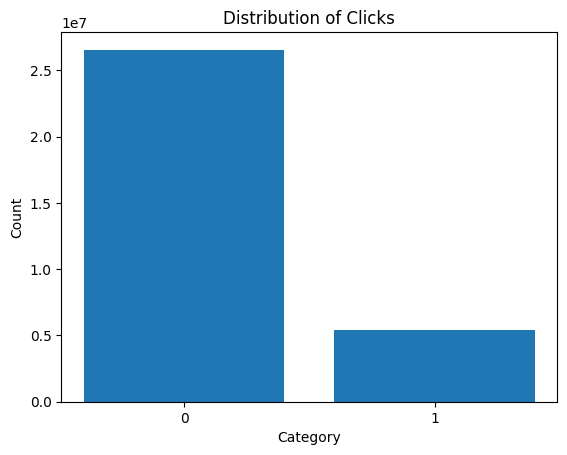

In [ ]:
import matplotlib.pyplot as plt

# Example data
y_count = new_df['click'].value_counts()

# Count the occurrences of 0 and 1
#counts = [Y.count(0), Y.count(1)]

# Plot
plt.bar(['0', '1'], y_count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Clicks')
plt.show()


In [ ]:
print(new_df.isnull().sum())  # This will show the count of missing values in each column


id                  0
click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
hour_of_day         0
day_of_the_week     0
dtype: int64


In [ ]:
corr_matrix = new_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')


<ipython-input-12-73453ae6c474>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_df.corr()


,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_the_week
id,1.000000,-0.000299,0.000407,0.000162,0.000439,0.000217,0.000284,-0.000326,-0.000034,0.000284,-0.000201,-0.000064,-0.000036,-0.000007,-0.000118,0.000132
click,-0.000299,1.000000,-0.038194,0.024094,-0.038821,-0.083933,-0.062358,-0.031589,0.130192,-0.058197,0.023471,0.000777,-0.057574,-0.067734,-0.004805,-0.009353
C1,0.000407,-0.038194,1.000000,0.292584,0.896394,0.201854,0.058609,0.124033,0.062705,0.067945,-0.047590,0.013227,-0.034428,0.043508,0.009126,-0.001768
banner_pos,0.000162,0.024094,0.292584,1.000000,0.326333,-0.080498,0.009398,0.061801,0.023562,-0.011428,0.090469,0.149437,0.052401,-0.063491,0.002216,0.055413
device_type,0.000439,-0.038821,0.896394,0.326333,1.000000,0.215046,0.047998,0.183341,0.064313,0.054672,-0.051558,0.005381,-0.049057,0.044055,0.014079,0.002719
device_conn_type,0.000217,-0.083933,0.201854,-0.080498,0.215046,1.000000,0.056484,0.069284,-0.014147,0.070598,-0.057592,-0.016517,0.089935,0.024582,0.039568,0.056173
C14,0.000284,-0.062358,0.058609,0.009398,0.047998,0.056484,1.000000,-0.000559,0.048615,0.975482,-0.235591,-0.164140,0.036815,0.402154,-0.048940,0.145159
C15,-0.000326,-0.031589,0.124033,0.061801,0.183341,0.069284,-0.000559,1.000000,-0.070665,-0.001931,0.017808,0.050582,0.008488,-0.008584,-0.005430,0.024017
C16,-0.000034,0.130192,0.062705,0.023562,0.064313,-0.014147,0.048615,-0.070665,1.000000,0.059130,0.080370,-0.071743,-0.047554,-0.074205,0.007546,0.005904
C17,0.000284,-0.058197,0.067945,-0.011428,0.054672,0.070598,0.975482,-0.001931,0.059130,1.000000,-0.251217,-0.159617,0.020716,0.417794,-0.046242,0.132759


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProjectTestData.csv')

In [ ]:
test_df.head(10)

In [ ]:
def label_encoding(train_df, test_df):

    cat_cols = train_df.select_dtypes(include='object').columns

    train_encoded = train_df.copy()
    test_encoded = test_df.copy()

    for col in cat_cols:
        le = LabelEncoder()

        # Corrected concatenation for fitting the encoder
        # It concatenates the values of the column from both dataframes
        le.fit(pd.concat([train_df[col], test_df[col]], ignore_index=True))

        # Transform the training and test data with the fitted encoder
        train_encoded[col] = le.transform(train_df[col])
        test_encoded[col] = le.transform(test_df[col])

    return train_encoded, test_encoded

In [ ]:
train_encoded, test_encoded = label_encoding(df, test_df)

label encoder all categorical variables

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify your path (e.g., "drive/My Drive/your_folder/")
path = '/content/drive/MyDrive/Colab Notebooks/test_encoded_data.csv'
test_encoded.to_csv(path, index=False)

path2= '/content/drive/MyDrive/Colab Notebooks/train_encoded_data.csv'
train_encoded.to_csv(path2, index=False)


,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3295858251275419735,14102809,1005,1,2428,5695,7,938,70,4,...,1.0,0.0,8334.0,300.0,50.0,761.0,3.0,175.0,100075.0,23.0
1,12281702837842634283,14103120,1007,0,2428,5695,7,4171,58,4,...,1.0,2.0,24303.0,320.0,50.0,2788.0,3.0,295.0,100194.0,240.0
2,4638380339534007785,14103109,1005,0,1465,5599,25,7503,236,0,...,1.0,0.0,24165.0,320.0,50.0,2776.0,0.0,35.0,-1.0,79.0
3,17039804736879076347,14103101,1002,0,1362,6417,7,7503,236,0,...,0.0,0.0,23438.0,320.0,50.0,2684.0,2.0,1327.0,-1.0,52.0
4,5753064066292192109,14103119,1005,1,4046,3697,25,7503,236,0,...,1.0,0.0,24084.0,320.0,50.0,2761.0,2.0,35.0,100148.0,13.0
5,9643534534808540874,14102206,1005,0,2039,6092,26,7503,236,0,...,1.0,0.0,21790.0,320.0,50.0,2513.0,3.0,35.0,100200.0,68.0
6,4608075673349047240,14103012,1005,0,2428,5695,7,1801,70,4,...,1.0,0.0,23866.0,320.0,50.0,2736.0,0.0,33.0,100170.0,246.0
7,17821871887360129065,14103005,1005,0,759,4521,4,7503,236,0,...,1.0,0.0,20213.0,320.0,50.0,2316.0,0.0,167.0,100077.0,16.0
8,11905524186420125376,14103108,1005,0,573,6969,2,7503,236,0,...,1.0,0.0,22676.0,320.0,50.0,2616.0,0.0,35.0,-1.0,51.0
9,14680890984963967557,14103014,1005,0,1698,3480,4,7503,236,0,...,1.0,0.0,17653.0,300.0,250.0,1994.0,2.0,39.0,100084.0,33.0


In [ ]:
# prompt: how to label encoder all the categorical variables of X_Train and X_Val

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in new_df.columns:
  if new_df[column].dtype == 'object':
      le.fit(new_df[[column]])
      new_df[column] = le.transform(new_df[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [ ]:
new_df.head(10)

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_the_week
0,1.000009e+18,0,1005,0,571,6951,2,7450,235,0,...,15706,320,50,1722,0,35,-1,79,0,21
1,1.000017e+19,0,1005,0,571,6951,2,7450,235,0,...,15704,320,50,1722,0,35,100084,79,0,21
2,1.000037e+19,0,1005,0,571,6951,2,7450,235,0,...,15704,320,50,1722,0,35,100084,79,0,21
3,1.000064e+19,0,1005,0,571,6951,2,7450,235,0,...,15706,320,50,1722,0,35,100084,79,0,21
4,1.000068e+19,0,1005,1,4540,4219,0,7450,235,0,...,18993,320,50,2161,0,35,-1,157,0,21
5,1.000072e+19,0,1005,0,3818,5405,24,7450,235,0,...,16920,320,50,1899,0,431,100077,117,0,21
6,1.000072e+19,0,1005,0,2594,1119,24,7450,235,0,...,20362,320,50,2333,0,39,-1,157,0,21
7,1.000092e+19,0,1005,1,4019,3686,24,7450,235,0,...,20632,320,50,2374,3,39,-1,23,0,21
8,1.000126e+19,0,1002,0,2395,5679,6,7450,235,0,...,21689,320,50,2496,3,167,100191,23,0,21
9,1.000187e+19,0,1005,1,4019,3686,24,7450,235,0,...,17747,320,50,1974,2,39,100019,33,0,21


In [ ]:
X=new_df.drop(['id','click'],axis=1)
Y=new_df['click']
X=X.drop(['C17','C1'],axis=1)

perform feature importance selection

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
X_small = new_df.sample(n=2000000, random_state=42)
X_small.drop(['id','click'],axis=1)
Y_small = X_small['click']

model = RandomForestClassifier(random_state=42)
model.fit(X_small, Y_small)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Assuming X_train is a DataFrame with column names
feature_names = X_small.columns

# Plotting as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_small.shape[1]), importances[indices], align="center")
plt.yticks(range(X_small.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()



label encoder on all categorical variables

In [ ]:
top_13_features_indices=indices[:13]
top_13_features=feature_names[top_10_features_indices]